# Calculating the Beta of Bitcoin

In [130]:
import requests
import pandas as pd
from datetime import datetime, timedelta


url = "https://min-api.cryptocompare.com/data/histoday?fsym=BTC&tsym=USD&limit=32"
page = requests.get(url)
data = page.json()["Data"]
data_frame = pd.DataFrame(data)
data_frame["Date"] = [datetime.fromtimestamp(d) for d in data_frame["time"]] #Converting the timestamp e.g 150038238 into proper format
data_frame["Date"] = pd.to_datetime(data_frame.Date).dt.date # converting the Date column in date_frame into datetime and only extracting date and omitting time 
data_frame = data_frame.set_index("Date") # Setting the index of this frame as Date column
del data_frame["time"] #deleting unrequired columns
del data_frame["volumefrom"]
del data_frame["volumeto"]
data_frame = data_frame.iloc[:31]

# a function to find the return of the bitcoin as well as the market index.
def price_changes(price):
    return ((price - price.shift(1))/price.shift(1))

return_of_bitcoin = price_changes(data_frame.close)
X = return_of_bitcoin[1:]
data_frame["price_return"] = X # Creating another column in data_frame with label price_return
data_frame = data_frame.iloc[1:]
data_frame

,close,high,low,open,price_return
Date,,,,,
2018-06-23,6166.54,6257.88,6033.20,6051.47,0.019015
2018-06-24,6157.78,6254.02,5782.13,6166.36,-0.001421
2018-06-25,6260.35,6344.45,6095.25,6157.78,0.016657
2018-06-26,6088.39,6286.36,6067.49,6260.40,-0.027468
2018-06-27,6141.57,6192.11,6021.69,6092.26,0.008735
2018-06-28,5871.28,6172.23,5844.26,6141.57,-0.044010
2018-06-29,6203.80,6286.67,5813.02,5870.81,0.056635
2018-06-30,6385.38,6503.33,6194.51,6203.81,0.029269
2018-07-01,6339.04,6429.50,6262.72,6385.43,-0.007257


array([0.07833322])

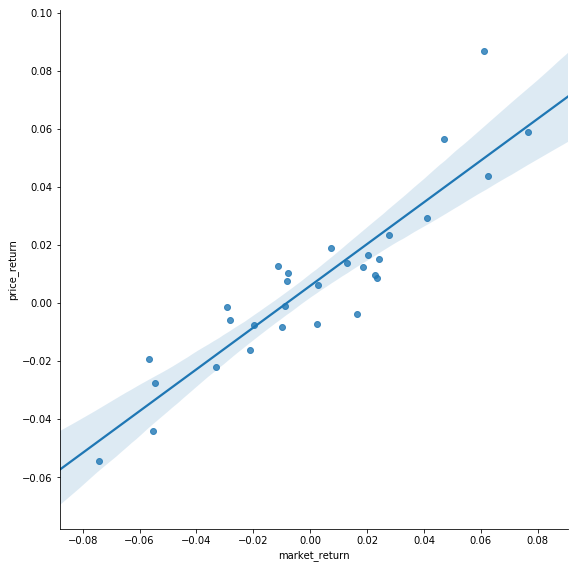

In [131]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import seaborn as sns


market_index = pd.read_csv("/Users/mbp/Downloads/cci30_OHLCV.csv")
market_index = market_index.sort_values(by="Date", ascending=True)

market_index["Date"] = pd.to_datetime(market_index.Date)
market_index = market_index.set_index("Date")
ts = pd.to_datetime(datetime.now() + timedelta(days=-1)).date() #converting the date into pandas datetime format 
# and subtracting one because the market index csv file doesn't have the data of the present day
date_to_start_from = pd.to_datetime(datetime.now() + timedelta(days=-34)) #
market_index = market_index.loc[date_to_start_from : ts] # Slicing the not required data so that market_index frame matches the data frame of bitcoin price
del market_index["Volume"]

return_of_market_index = price_changes(market_index.Close) # Calculating the return of market index
y = return_of_market_index.iloc[1:]
data_frame["market_return"] = y # Creating another column with label market_return in bitcoin data frame

sns.pairplot(data_frame, x_vars=["market_return"], y_vars="price_return", size=8, kind="reg") # Plotting the market_return as independent variable and price_return of bitcoin as dependent variable
X1 = data_frame[["market_return"]] # Selecting the features column from the data frame with which we want to predict the dependent variable
Y1 = data_frame["price_return"] # Selecting the depending variable which we want to predict through linear regression

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, random_state=1) # training the data set with sci-kit learn
linreg = LinearRegression()
linreg.fit(X_train, y_train) # Creating our model

y_pred = linreg.predict(X_test) # Predicting on the basis of the X_test values
y_pred

np.sqrt(metrics.mean_squared_error(y_test, y_pred)) # Finding the RMSE (Root Mean Square Error) to see how correctly our model predicts the result. The lower the value the lower the chance of an error

my_pred = linreg.predict([[0.0996]]) # Just predicting if our market index return increases to 0.0996 then what will happen?
my_pred 